# Lead Score - Case Study

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>
## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

import few important libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1 : Loading and Cleaning Data

##  1.1  Import Data 

In [2]:
df = pd.read_csv(r'C:\Users\\AJIT\\Desktop\\lead scoring case study\\Lead Scoring Assignment\\leads.csv')

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 1.2 Inspect the dataframe
This helps to give a good idea of the dataframes.

In [4]:
df.shape

(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

We can see that there are lot of categorical columns available in our data. We have 4 columns with float values, 3 columns with integer values and 30 columns with categorical values.

In [6]:
from matplotlib import gridspec
from pandas import plotting
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from itertools import product
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


In [7]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending = False)

Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

## 1.3 Cleaning the dataframe

#### Let's exclude those columns where we have Null Values more than 40% as imputing those values will not going to be good strategy but if we try to include those columns there may be a chance of bias & within class imbalance will gets added to our model so for now what we can do is to exclude those columns only and try to impute those columns where we have null values below the threshold which we are consider for selecting those columns for imputation.

In [8]:
# dropping more then 40%
df = df.drop(["Lead Quality",'Asymmetrique Activity Score', 'Asymmetrique Profile Score', "Asymmetrique Profile Index", "Asymmetrique Activity Index"], axis = 1)

In [9]:
# check again to remaining varibles
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending = False)

Tags                                             36.287879
What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Origin                                       0.000000
Lead Number                                       0.000000
Do Not Email                                      0.000000
Converted                                         0.000000
Total Time Spent on Website                       0.0000

lets plot thier Graphs to understand better about them.

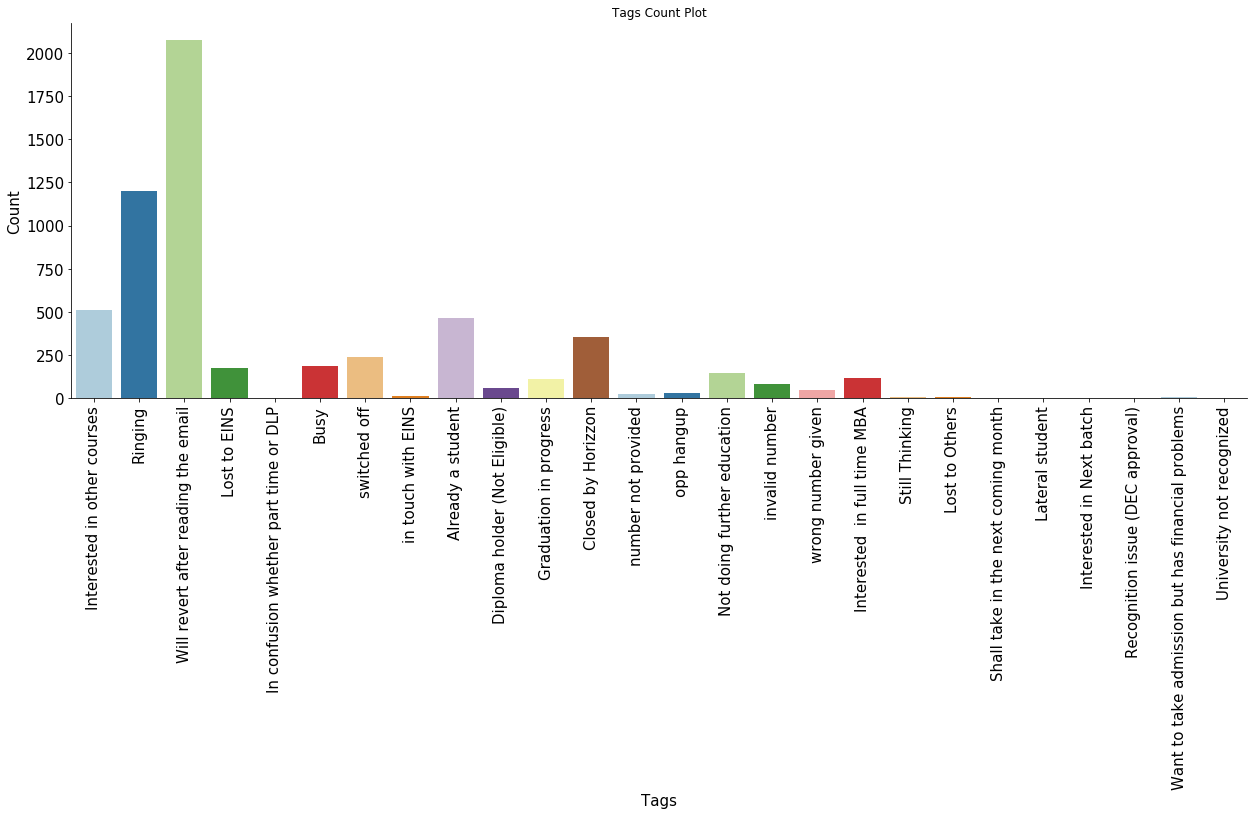

In [10]:
#tags 
sns.catplot(data = df, x = 'Tags', kind = 'count', palette = 'Paired', aspect = 3, height=6).set(title = 'Tags Count Plot')
plt.xticks(rotation = 'vertical')
plt.tick_params(labelsize=15)
plt.xlabel("Tags", size = 15)
plt.ylabel("Count", size = 15)
plt.show()

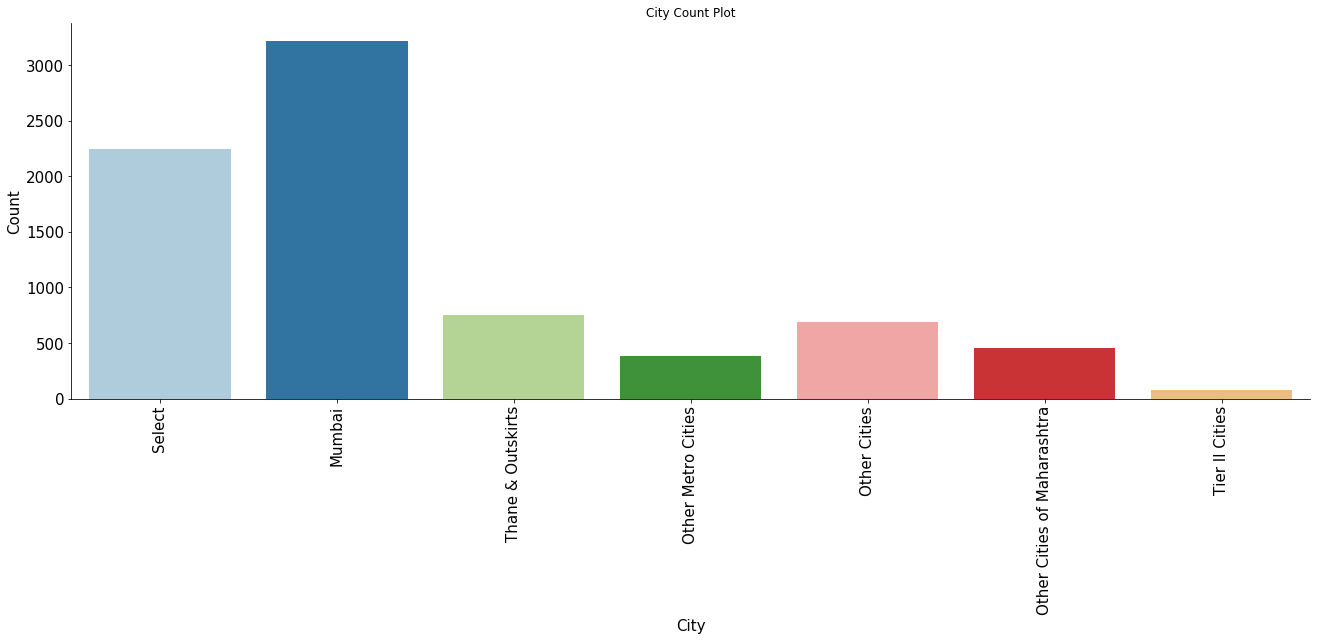

In [11]:
#city counts
sns.catplot(data = df, x = 'City', kind = 'count', palette = 'Paired', aspect = 3, height=6).set(title = 'City Count Plot')
plt.xticks(rotation = 'vertical')
plt.tick_params(labelsize=15)
plt.xlabel("City", size = 15)
plt.ylabel("Count", size = 15)
plt.show()

We have close to ~15% Null values in our city columns but most of the users who have filled the lead form are from "Mumbai" but most people have not selected their city.

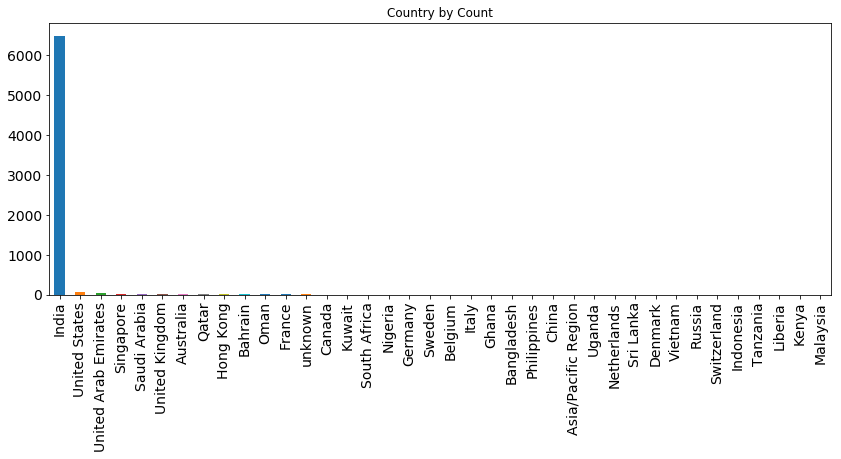

In [12]:
# country count
plt.figure(figsize=(14,5))
df.Country.value_counts().plot(kind = 'bar').set(title = "Country by Count")
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

Based on the above count plot we can say that mostly audience are from "India".

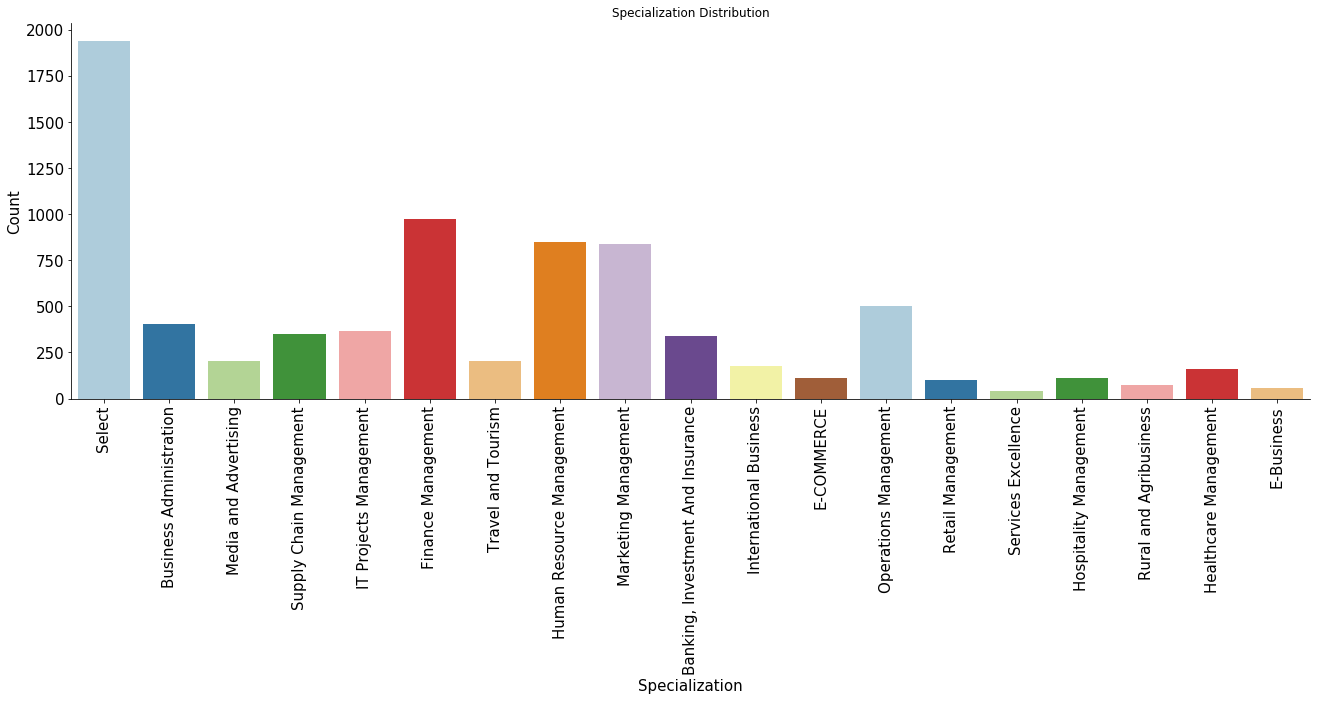

In [13]:
# specialization count
sns.catplot(data = df, x = 'Specialization', kind = 'count', palette = 'Paired', aspect = 3, height=6).set(title = 'Specialization Distribution')
plt.xticks(rotation = 'vertical')
plt.tick_params(labelsize=15)
plt.xlabel("Specialization", size = 15)
plt.ylabel("Count", size = 15)
plt.show()

When it comes to Specialization, we have ~16% Null values and 21% people have not selected the values. But apart from that Finance Management, HR & Marketing Management are the most popular specialization among the users.

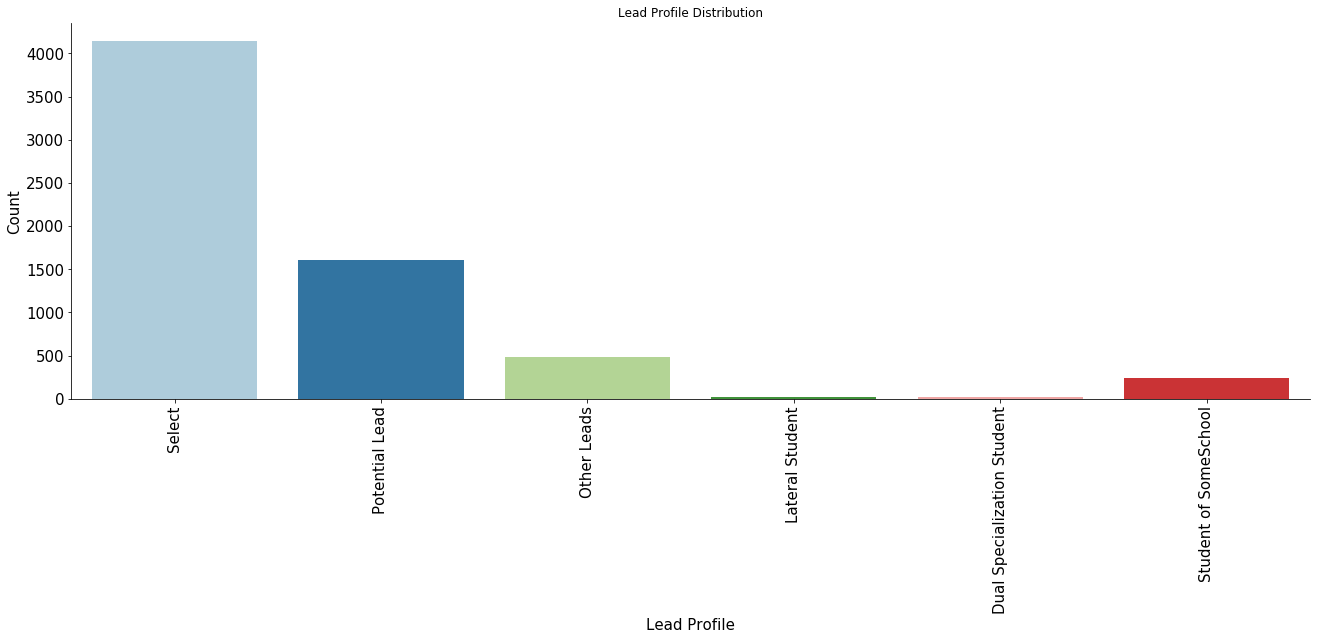

In [14]:
# lead profile Distribution
sns.catplot(data = df, x = 'Lead Profile', kind = 'count', palette = 'Paired', aspect = 3, height=6).set(title = 'Lead Profile Distribution')
plt.xticks(rotation = 'vertical')
plt.tick_params(labelsize=15)
plt.xlabel("Lead Profile", size = 15)
plt.ylabel("Count", size = 15)
plt.show()

When it comes to Lead Profile Distribution, we have 29.3% Null Values with ~45% have not selected the values.

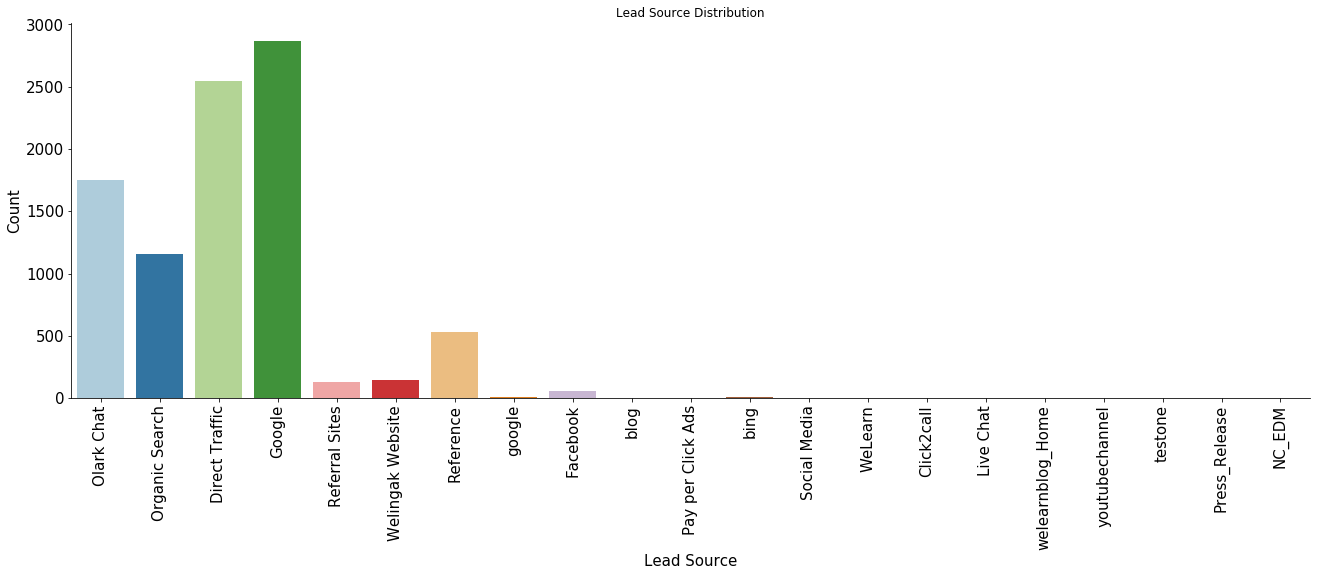

In [15]:
# lead Source Distriibution
sns.catplot(data = df, x = 'Lead Source', kind = 'count', palette = 'Paired', aspect = 3, height=6).set(title = 'Lead Source Distribution')
plt.xticks(rotation = 'vertical')
plt.tick_params(labelsize=15)
plt.xlabel("Lead Source", size = 15)
plt.ylabel("Count", size = 15)
plt.show()

In our data "Google" is the most popular lead source destination followed by "Direct Traffic", "Olark Chat" and "Organic Search". One thing to note here is that we have not included the null values.

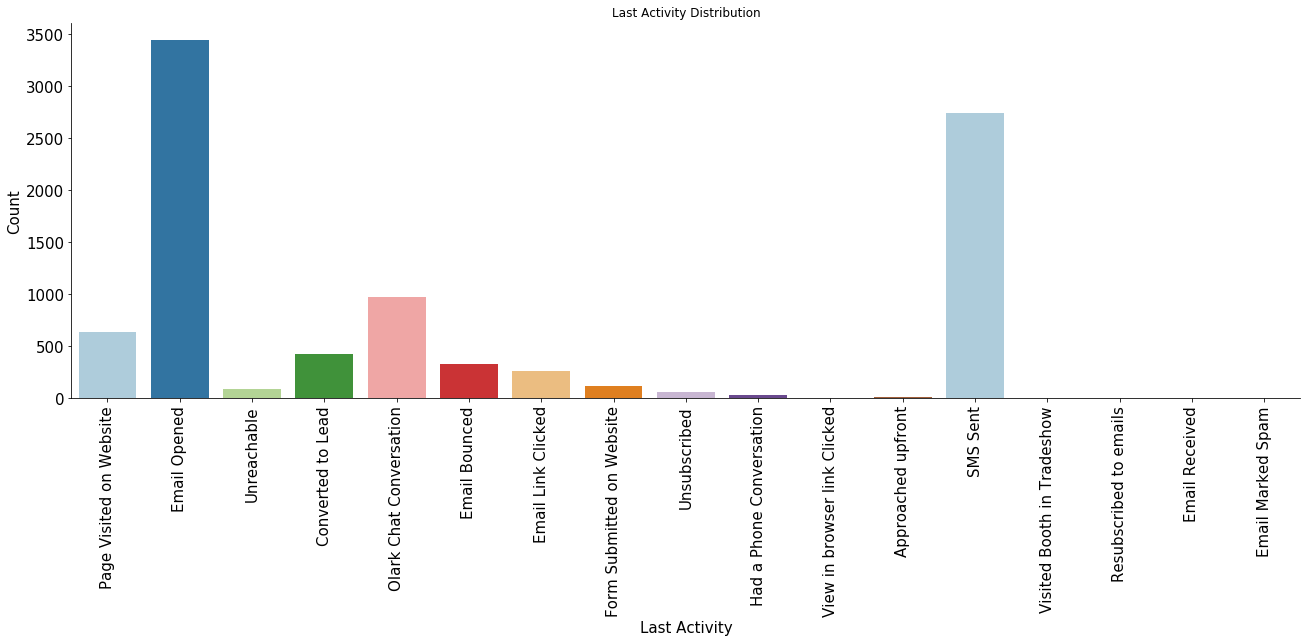

In [16]:
# last Activity Distribution
sns.catplot(data = df, x = 'Last Activity', kind = 'count', palette = 'Paired', aspect = 3, height=6).set(title = 'Last Activity Distribution')
plt.xticks(rotation = 'vertical')
plt.tick_params(labelsize=15)
plt.xlabel("Last Activity", size = 15)
plt.ylabel("Count", size = 15)
plt.show()

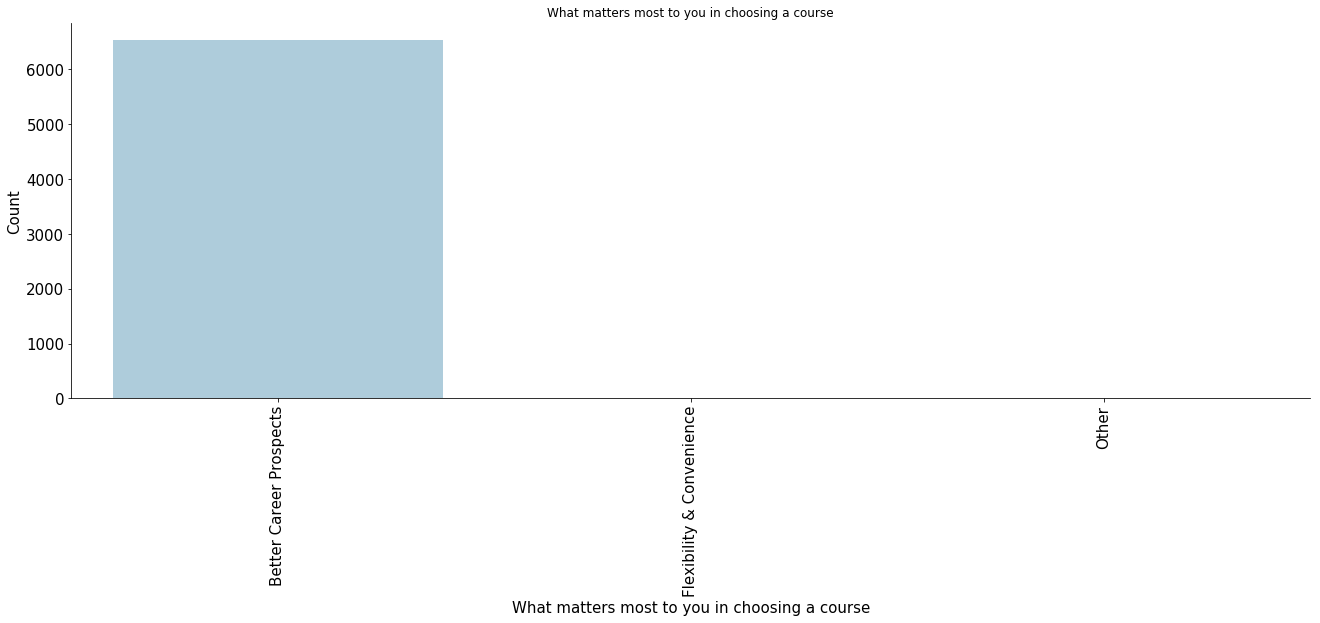

In [17]:
 What matter most to you in chossing a course
sns.catplot(data = df, x = 'What matters most to you in choosing a course', kind = 'count', palette = 'Paired', aspect = 3, height=6).set(title = 'What matters most to you in choosing a course')
plt.xticks(rotation = 'vertical')
plt.tick_params(labelsize=15)
plt.xlabel("What matters most to you in choosing a course", size = 15)
plt.ylabel("Count", size = 15)
plt.show()

The one most important point to note here is that the prospects who have filled the lead form for course inquiry are looking for "Better Career Prospects" which is obvious that's what we human are. We always seek to look for better opportunity.

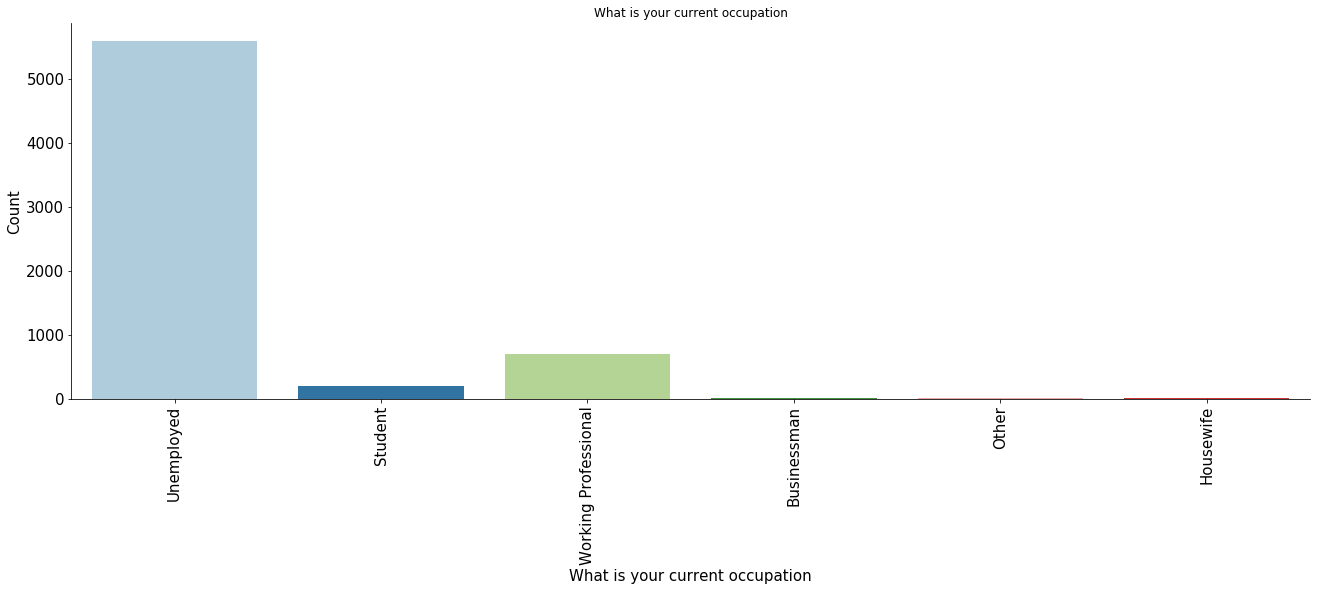

In [18]:
# what is your current occupation
sns.catplot(data = df, x = 'What is your current occupation', kind = 'count', palette = 'Paired', aspect = 3, height=6).set(title = 'What is your current occupation')
plt.xticks(rotation = 'vertical')
plt.tick_params(labelsize=15)
plt.xlabel("What is your current occupation", size = 15)
plt.ylabel("Count", size = 15)
plt.show()

One more interesting point here is that the users who have filled this form are "Unemployed". Apart from that "Working Professional" are also looking to upskill themselves for better career opportunities.

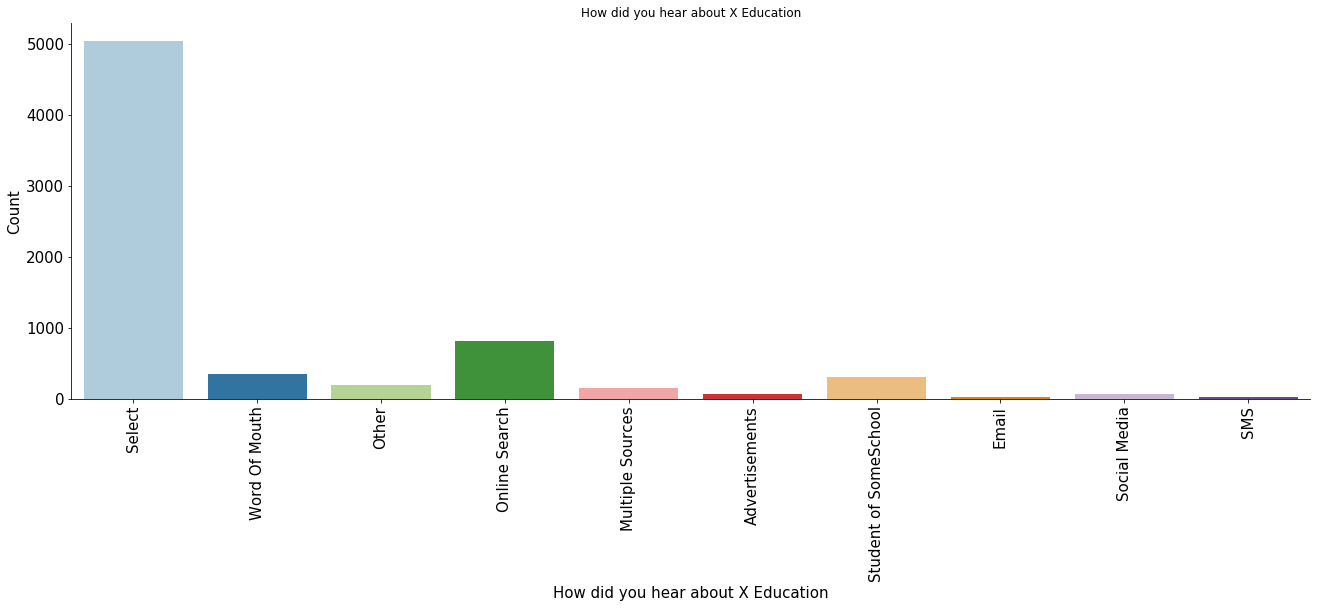

In [19]:
# how did you hear about X Education
sns.catplot(data = df, x = 'How did you hear about X Education', kind = 'count', palette = 'Paired', aspect = 3, height=6).set(title = 'How did you hear about X Education')
plt.xticks(rotation = 'vertical')
plt.tick_params(labelsize=15)
plt.xlabel("How did you hear about X Education", size = 15)
plt.ylabel("Count", size = 15)
plt.show()

When it comes to user acquistion medium, if we exclude the not "selected" and "null" values, the "Online Search" is the most popular user acquisiton medium followed by "Word of Mouth".

### So now we have a fair understanding of our categorical data and we also know some of the reason behind the null values which is more important as a analyst before taking any preprocessing or feature engineering step. Now we are going to impute our categorical data. 

In [20]:
# Count of null value present in data to impute in right way.
df.isnull().sum().sort_values(ascending = False)

Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Origin                                         0
Lead Number                                         0
Do Not Email                                        0
Converted                                           0
Total Time Spent on Website                         0
Do Not Call                                         0
Last Notable Activity       

In [21]:
#Let's first impute the Lead Source
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
youtubechannel          1
testone                 1
NC_EDM                  1
welearnblog_Home        1
Pay per Click Ads       1
blog                    1
WeLearn                 1
Name: Lead Source, dtype: int64

As you can see here, we have same lead source named as 2 different which we can combine. So let's first combine them both.

In [22]:
# Replacing google to Google as both are same.
df['Lead Source'].replace(to_replace = 'google', value = 'Google', inplace = True)

In [23]:
# check again
df['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
youtubechannel          1
testone                 1
NC_EDM                  1
welearnblog_Home        1
Pay per Click Ads       1
blog                    1
WeLearn                 1
Name: Lead Source, dtype: int64

See, it seems much fine now. Now for the 36 values which are null, what we can do is we can introduce a new lead source named "Others".

In [24]:
# introducing others
df['Lead Source'].replace(to_replace = np.nan, value = 'Others', inplace = True)

In [25]:
# check again
df['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
Others                 36
bing                    6
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
youtubechannel          1
testone                 1
NC_EDM                  1
welearnblog_Home        1
Pay per Click Ads       1
blog                    1
WeLearn                 1
Name: Lead Source, dtype: int64

Now we are going to impute the "Last Activity" column but the imputation will going to be done on using the secondary column which is more correlated with our 'Last Activity' column which is 'Tags'. So based on tags we will going to impute the 'Last Activity' by using the most frequent item.

In [26]:
# we are creating a new variable for those values which are either 'Select' or 'NaN' for these 4 columns.
df['City'].replace(to_replace = ['Select', np.nan], value = 'Unspecified', inplace = True)
df['Specialization'].replace(to_replace = ['Select', np.nan], value = 'Unspecified', inplace = True)
df['Lead Profile'].replace(to_replace = ['Select', np.nan], value = 'Unspecified', inplace = True)
df['How did you hear about X Education'].replace(to_replace = ['Select', np.nan], value = 'Unspecified', inplace = True)

#imputing with most frequent item in a itemset
df["What matters most to you in choosing a course"].replace(to_replace = np.nan, value = 'Better Career Prospects', inplace = True)
df["What is your current occupation"].replace(to_replace = np.nan, value = 'Unemployed', inplace = True)

In [27]:
# Lets check null values
df.isnull().sum().sort_values(ascending = False)

Tags                                             3353
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Last Notable Activity                               0
What is your current occupation                     0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
Total Time Spent on Website                         0
Specialization                                      0
How did you hear about X Education                  0
What matters most to you in choosing a course       0
A free copy of Mastering The Interview              0
Search                      

In [28]:
# counrty can be dropperd 1. it is not required as not a deciding factor. 2. 95 % are indians 
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Canada                     4
Kuwait                     4
South Africa               4
Nigeria                    4
Germany                    4
Sweden                     3
Belgium                    2
Italy                      2
Ghana                      2
Bangladesh                 2
Philippines                2
China                      2
Asia/Pacific Region        2
Uganda                     2
Netherlands                2
Sri Lanka                  1
Denmark                    1
Vietnam                    1
Russia                     1
Switzerland                1
Indonesia                  1
Tanzania      

In [29]:
# lets Drop Country as most of are belong to india only
df.drop("Country", axis = 1, inplace = True)

In [30]:
# checking null values again
df.isnull().sum().sort_values(ascending = False)

Tags                                             3353
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Last Notable Activity                               0
What matters most to you in choosing a course       0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
Total Time Spent on Website                         0
Specialization                                      0
How did you hear about X Education                  0
What is your current occupation                     0
Search                                              0
A free copy of Mastering The Interview              0
Magazine                    

imputing Totalvisits & page views per visit with median 

In [31]:
df['TotalVisits'] = df['TotalVisits'].fillna(df['TotalVisits'].median())

In [32]:
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median())

In [33]:
df['Last Activity'].replace(to_replace = np.nan, value = 'Email Opened', inplace = True)

In [34]:
# lets check null value again
df.isnull().sum().sort_values(ascending = False)

Tags                                             3353
Last Notable Activity                               0
What matters most to you in choosing a course       0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Specialization                                      0
How did you hear about X Education                  0
What is your current occupation                     0
Search                                              0
A free copy of Mastering The Interview              0
Magazine                    

In [35]:
#dropping prospect id as we have lead number so these 2 will be the same for the identification
df.drop('Prospect ID', axis = 1, inplace = True)

In [38]:
# tags are having more then 35 % value missing . imputing them will be bias with the results , although last acitivity , last notable acivity give us the same sense .
df.drop('Tags', axis = 1, inplace = True)

In [39]:
# final checking after dealing with missing values.
df.isnull().sum().sort_values(ascending = False)

Last Notable Activity                            0
What matters most to you in choosing a course    0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
Search                                           0
A free copy of Mastering The Interview           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

In [41]:
# shape of data.
df.shape

(9240, 29)

In [44]:
# Dropping unique valued columns before EDA.
df.drop(['Lead Profile','Update me on Supply Chain Content','How did you hear about X Education','Get updates on DM Content','Lead Number','Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque'],axis=1,inplace=True)


In [45]:
# final shape of data before EDA.
df.shape

(9240, 21)

## EDA

## 2.1. Univariate Analysis

### 2.1.1. Categorical Variables

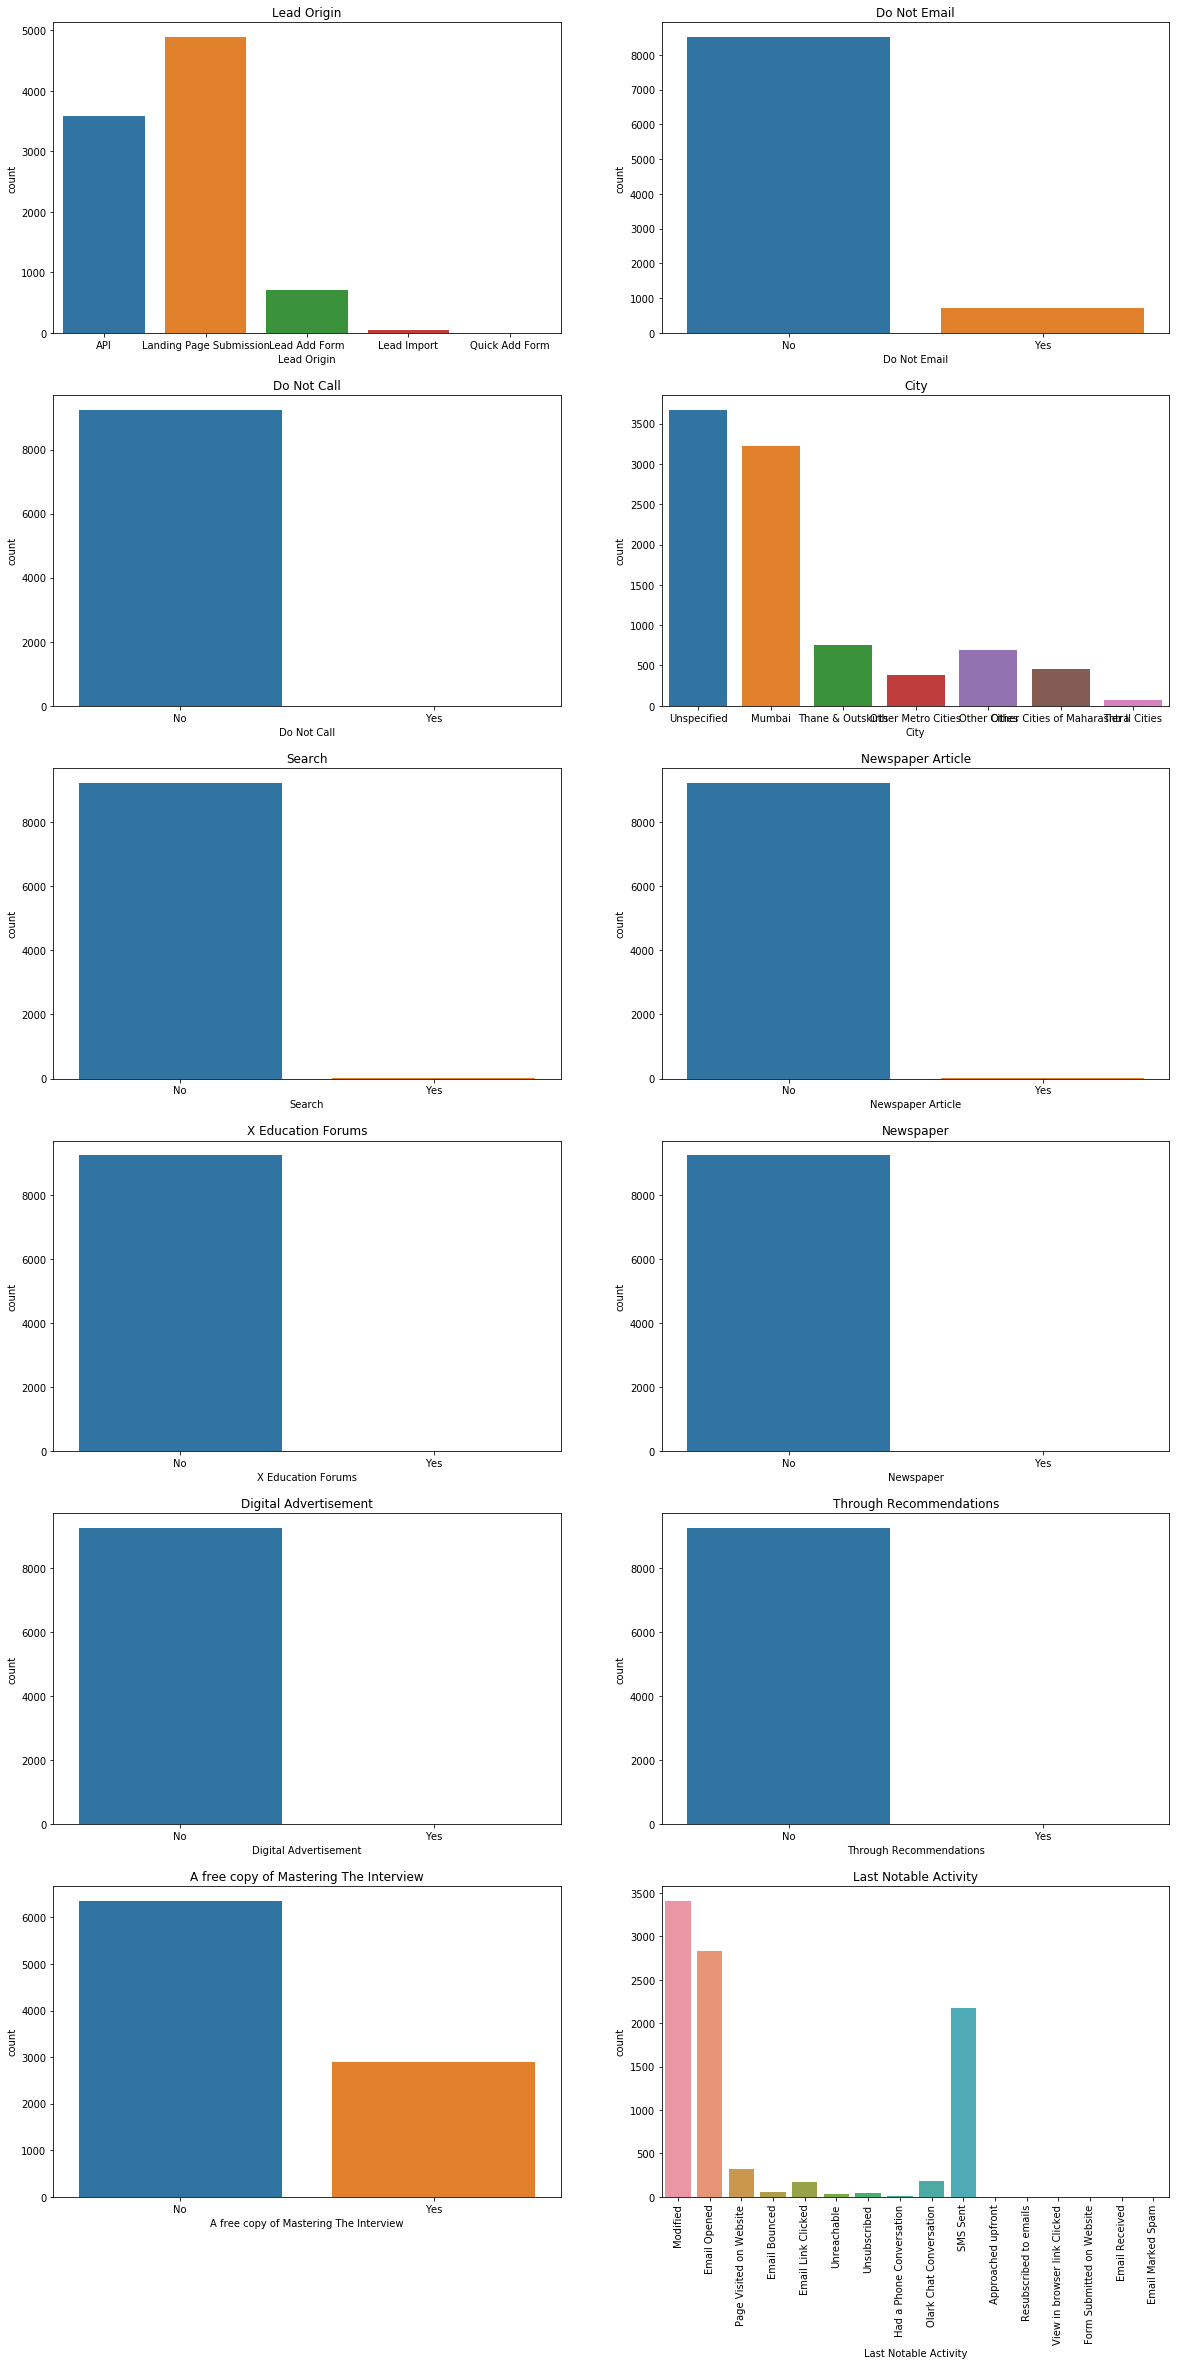

In [59]:
# plotting the Graphs by their counts.
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(df['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df['City'])
plt.title('City')

plt.subplot(6,2,5)
sns.countplot(df['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(df['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(df['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(df['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(df['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(df['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(df['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()





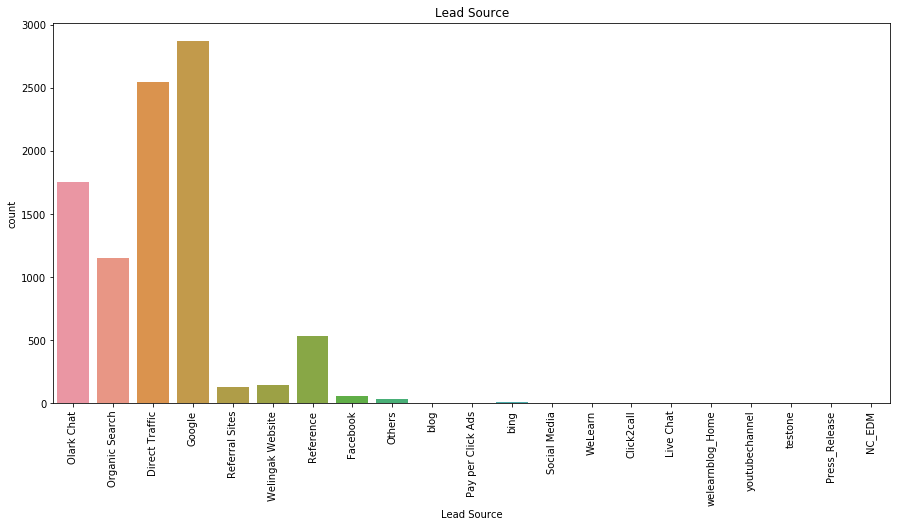

In [54]:
plt.figure(figsize = (15,7))
plt.subplot(1,1,1)
sns.countplot(df['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

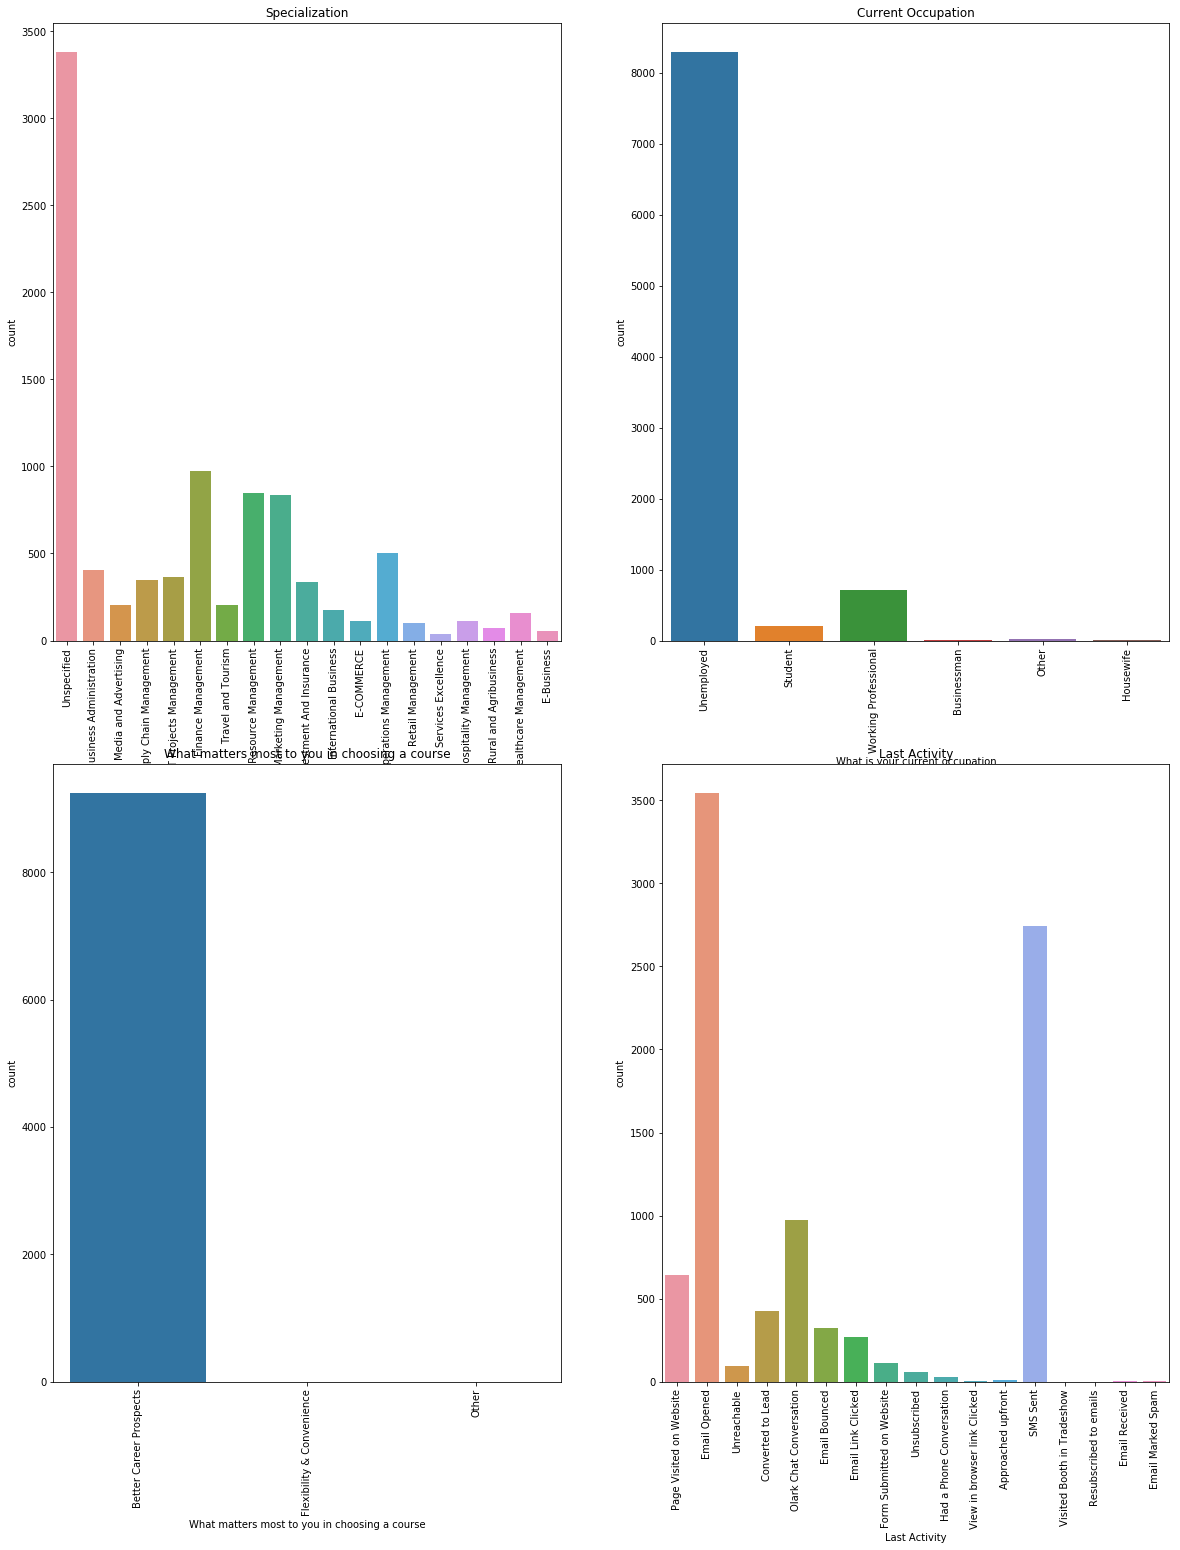

In [57]:
plt.figure(figsize = (20,25))
plt.subplot(2,2,1)
sns.countplot(df['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(df['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(df['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(df['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

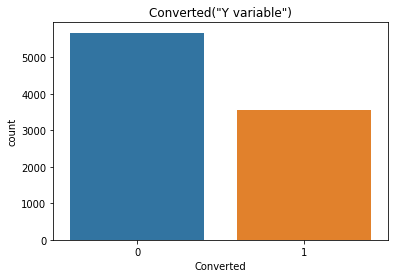

In [60]:
sns.countplot(df['Converted'])
plt.title('Converted("Y variable")')
plt.show()

### 2.1.2. Numerical Variables

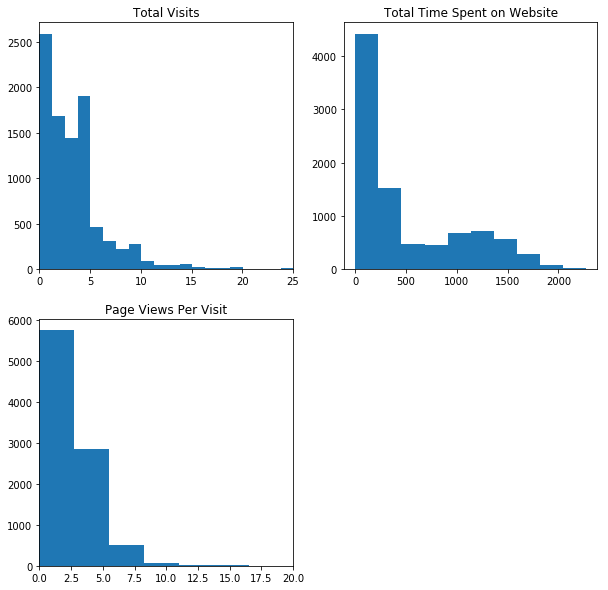

In [62]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### 2.2. Relating all the categorical variables to Target variable "Converted"

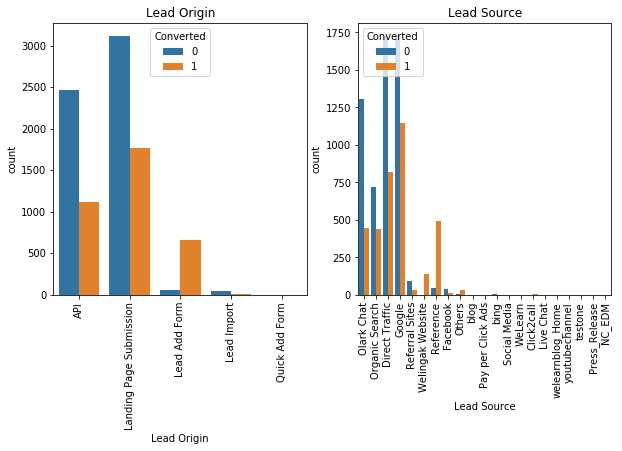

In [63]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

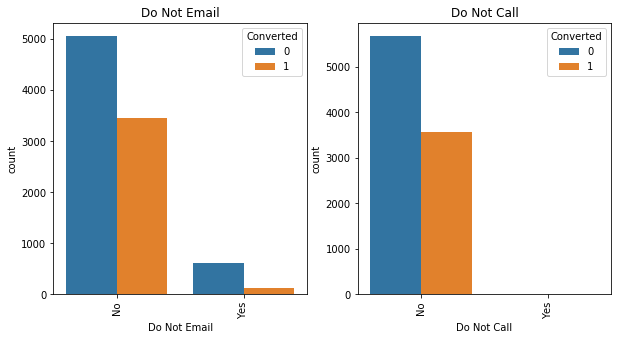

In [64]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

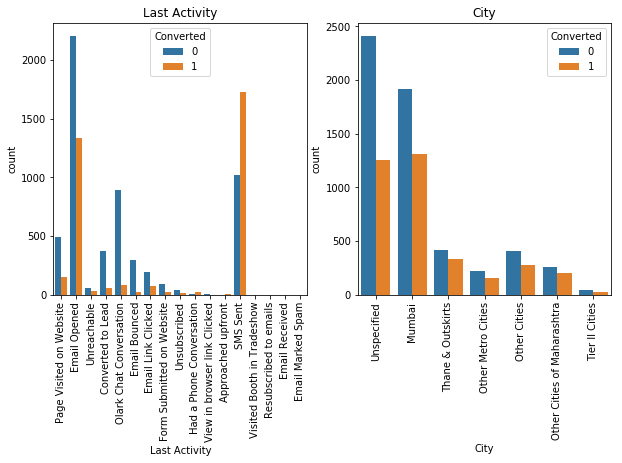

In [66]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='City', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('City')
plt.show()

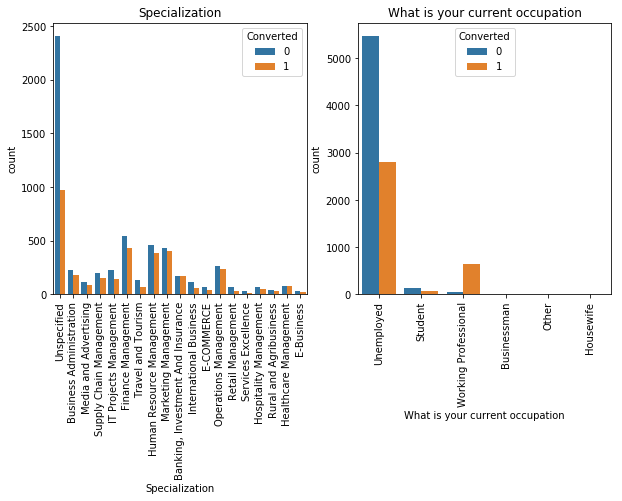

In [67]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

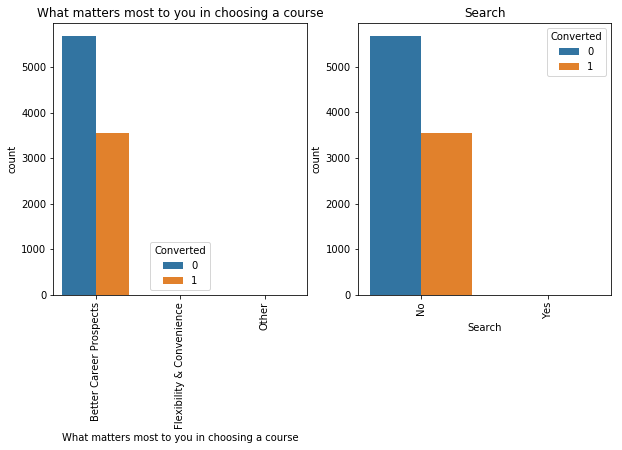

In [68]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

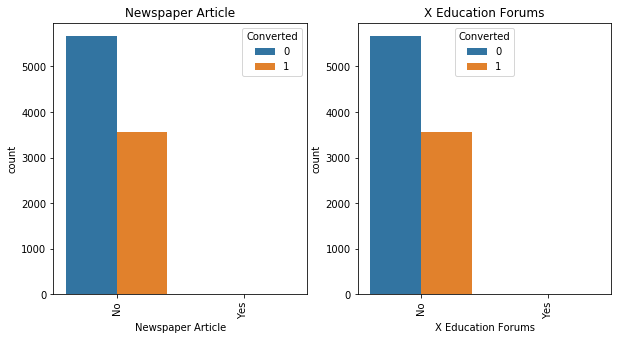

In [69]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

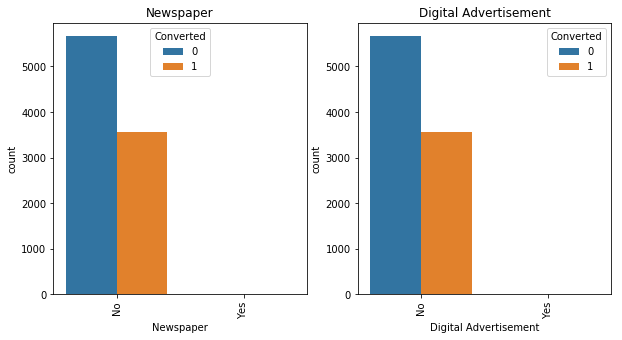

In [70]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

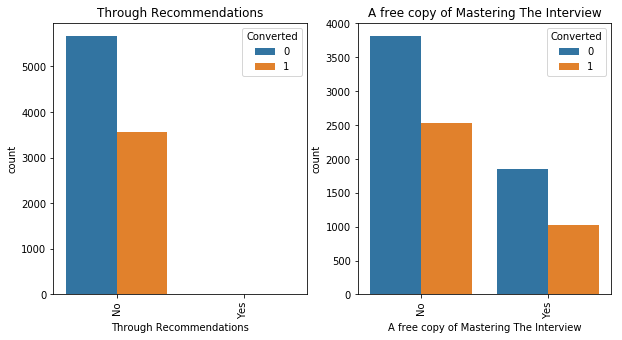

In [71]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

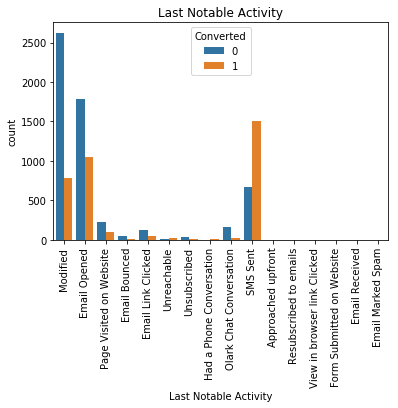

In [72]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

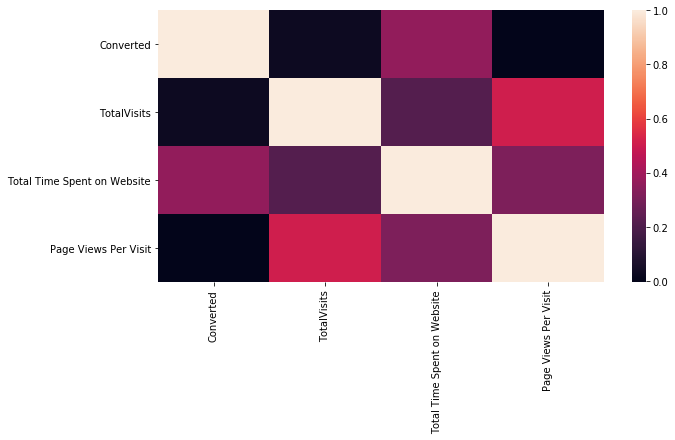

In [73]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(df.corr())
plt.show()

### Checking outliers

In [74]:
# checking outliers.
numeric = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
99%,17.000000,1840.610000,9.000000
max,251.000000,2272.000000,55.000000


There aren't any major outliers, so moving on to analysis

## 3. Dummy Variables

In [75]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
Lead Origin                                      9240 non-null object
Lead Source                                      9240 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9240 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9240 non-null float64
Last Activity                                    9240 non-null object
Specialization                                   9240 non-null object
What is your current occupation                  9240 non-null object
What matters most to you in choosing a course    9240 non-null object
Search                                           9240

In [77]:
# object type variables
df.loc[:, df.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [78]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df = pd.concat([df, dummy], axis=1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unspecified,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unspecified,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unspecified,...,0,0,1,0,0,0,0,0,0,0


In [82]:
# drop the original columns after creating dummy variable.
df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'City', 'Specialization', 'What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], axis= 1, inplace=True)
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [83]:
# shape of data before train-test split
df.shape

(9240, 84)

## 4. Test-Train Split

In [84]:
# Import the required library
from sklearn.model_selection import train_test_split

In [85]:
# drop converted variable in X
X = df.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [86]:
# Putting the target variable in y
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [87]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [88]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3112,0.007968,0.182867,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8413,0.019920,0.679538,0.208333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2961,0.011952,0.553928,0.041667,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0.023904,0.504660,0.062500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2740,0.011952,0.445184,0.125000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


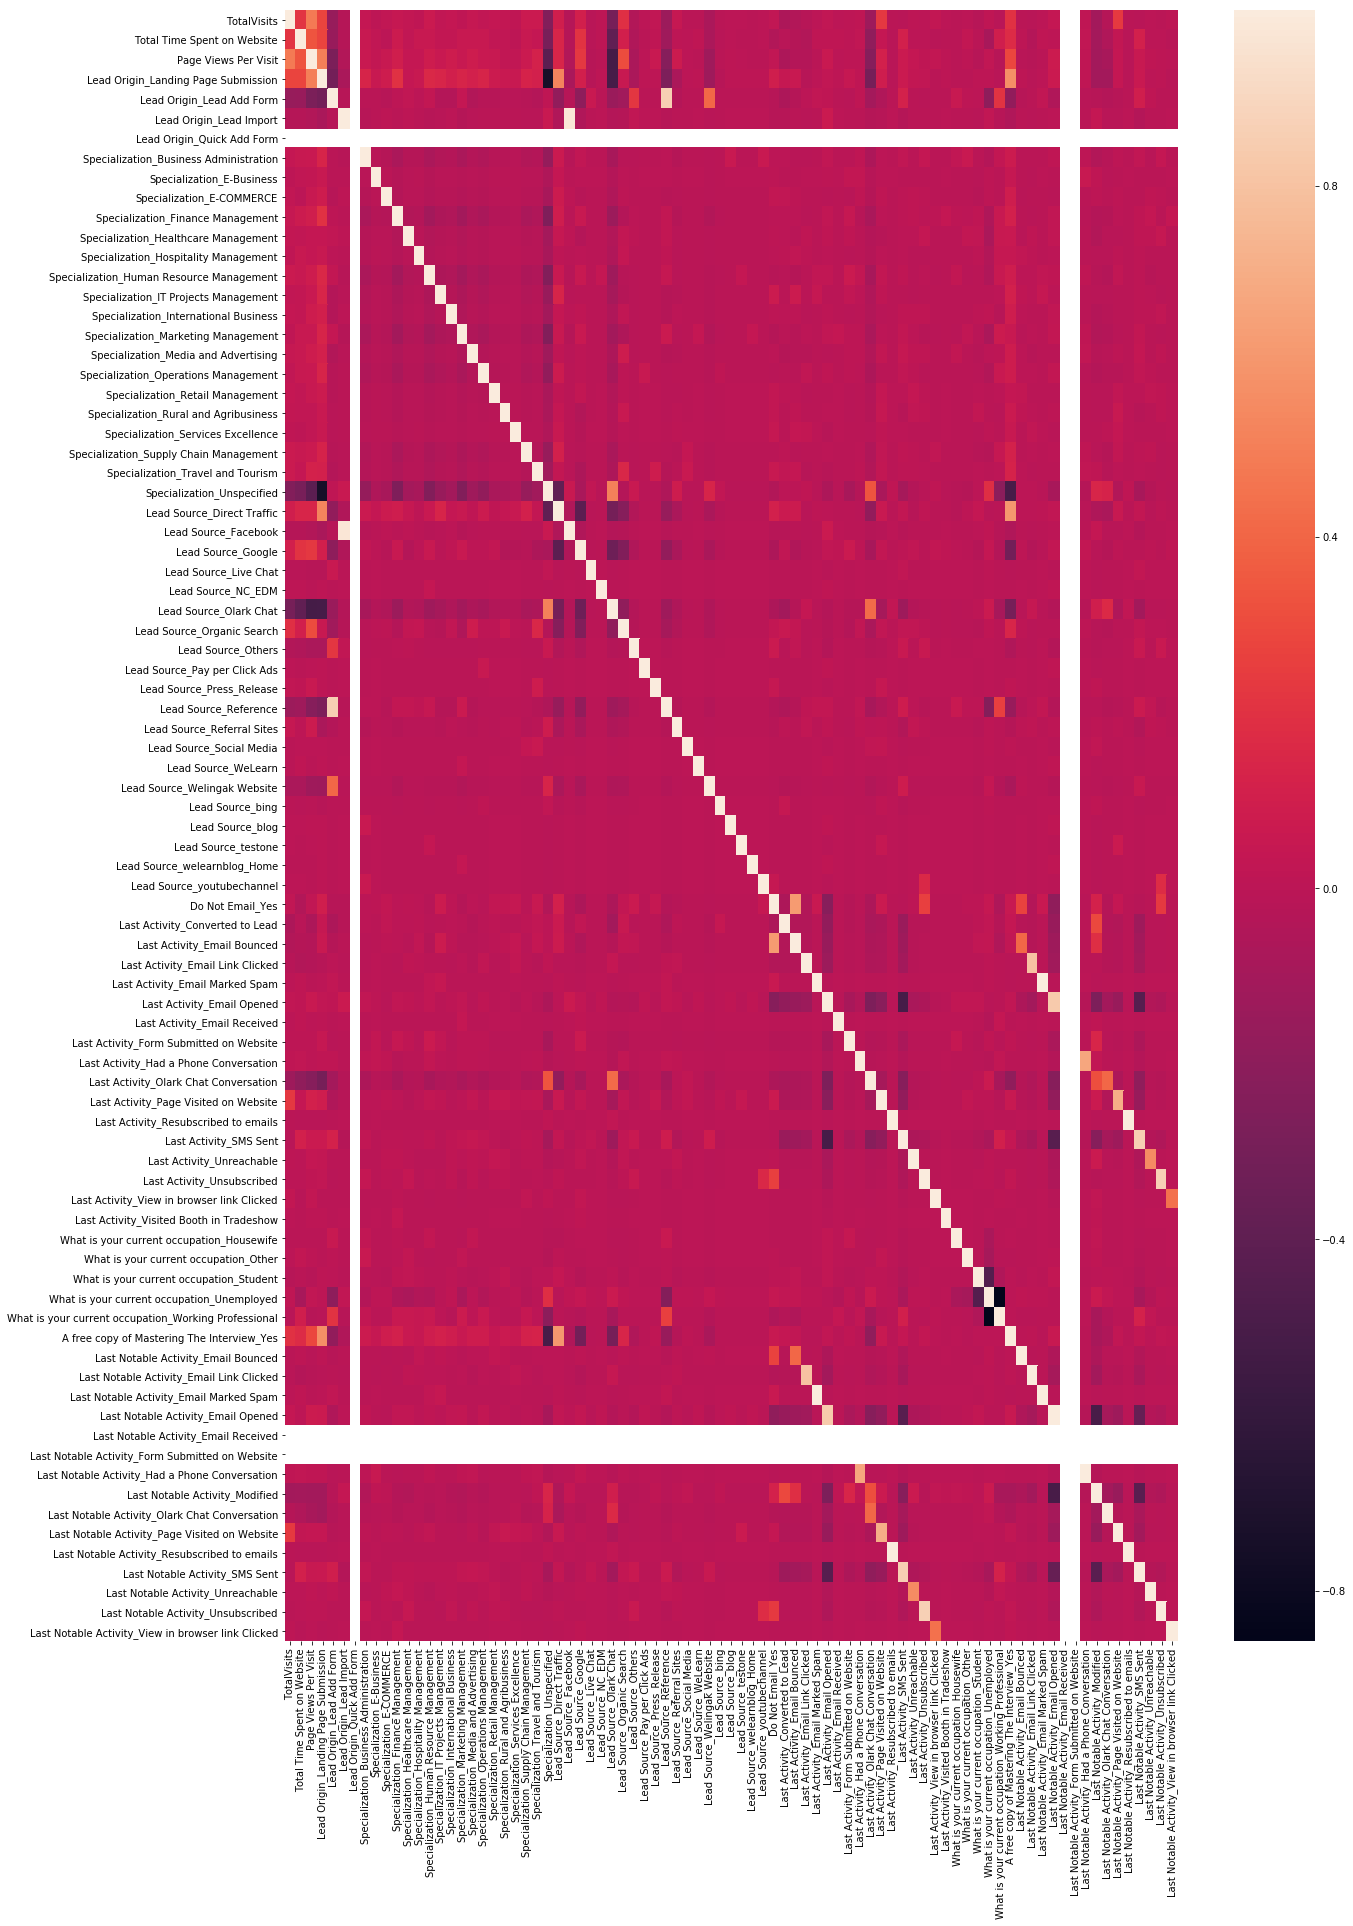

In [89]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

Since there are a lot of variables it is difficult to drop variable. We'll do it after RFE

## 5. Model Building

In [90]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [91]:
# Import RFE
from sklearn.feature_selection import RFE

In [92]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [93]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 59),
 ('Lead Origin_Quick Add Form', False, 67),
 ('Specialization_Business Administration', False, 48),
 ('Specialization_E-Business', False, 49),
 ('Specialization_E-COMMERCE', False, 60),
 ('Specialization_Finance Management', False, 64),
 ('Specialization_Healthcare Management', False, 50),
 ('Specialization_Hospitality Management', False, 28),
 ('Specialization_Human Resource Management', False, 58),
 ('Specialization_IT Projects Management', False, 53),
 ('Specialization_International Business', False, 32),
 ('Specialization_Marketing Management', False, 57),
 ('Specialization_Media and Advertising', False, 38),
 ('Specialization_Operations Management', False, 63),
 ('Specialization_Retail Management', False, 27),
 ('Specialization_Rural and Agribusi

In [94]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

All the variables selected by RFE, next statistics part (p-values and the VIFs).

In [95]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [96]:
# Importing statsmodels
import statsmodels.api as sm

In [97]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2690.2
Date:                Sat, 12 Nov 2022   Deviance:                       5380.3
Time:                        19:10:46   Pearson chi2:                 6.75e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5721      0.126     -4.553      0.000      -0.818      -0.326
TotalVisits                                              5.3168      2.243      2.370      0.018       0.920       9.713
Total Time Spent on Website                              4.1767      0.154     27.194      0.000       3.876       4.478
Page Views Per Visit                                    -2.8665      0.539     -5.321      0.000      -3.922      -1.811
Lead Origin_Landing Page Submission                     -1.2723      0.121    -10.496      0.000      -1.510      -1.035
Lead Origin_Lead Add Form                                2.7096      0.208     13.043      0.000       2.302       3.117
Specialization_Unspecified                              -1.1334      0.122     -9.265      0.000      -1.373      -0.894
Lead Source_Others                                       1.0785      0.632      1.708      0.088      -0.159       2.316
Lead Source_Welingak Website                             3.0204      1.031      2.930      0.003       1.000       5.041
Do Not Email_Yes                                        -1.4208      0.170     -8.370      0.000      -1.754      -1.088
Last Activity_SMS Sent                                   1.3870      0.074     18.712      0.000       1.242       1.532
What is your current occupation_Housewife               23.0030   1.76e+04      0.001      0.999   -3.46e+04    3.46e+04
What is your current occupation_Working Professional     2.6569      0.187     14.172      0.000       2.289       3.024
Last Notable Activity_Had a Phone Conversation           2.9294      1.113      2.631      0.009       0.747       5.112
Last Notable Activity_Modified                          -0.9547      0.078    -12.293      0.000      -1.107      -0.802
Last Notable Activity_Unreachable                        2.0333      0.668      3.046      0.002       0.725       3.342
========================================================================================================================
"""

In [101]:
# p value are more then 0.05 so droping the columns
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [105]:
X_train.drop('Lead Source_Others', axis = 1, inplace = True)

In [106]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2696.0
Date:                Sat, 12 Nov 2022   Deviance:                       5392.0
Time:                        19:20:36   Pearson chi2:                 6.81e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5857      0.125     -4.671      0.000      -0.831      -0.340
TotalVisits                                              5.2514      2.231      2.354      0.019       0.879       9.624
Total Time Spent on Website                              4.1732      0.153     27.197      0.000       3.872       4.474
Page Views Per Visit                                    -2.8528      0.538     -5.307      0.000      -3.906      -1.799
Lead Origin_Landing Page Submission                     -1.2569      0.121    -10.394      0.000      -1.494      -1.020
Lead Origin_Lead Add Form                                2.8362      0.202     14.039      0.000       2.440       3.232
Specialization_Unspecified                              -1.1182      0.122     -9.170      0.000      -1.357      -0.879
Lead Source_Welingak Website                             2.8852      1.029      2.804      0.005       0.868       4.902
Do Not Email_Yes                                        -1.3835      0.166     -8.329      0.000      -1.709      -1.058
Last Activity_SMS Sent                                   1.3852      0.074     18.710      0.000       1.240       1.530
What is your current occupation_Working Professional     2.6504      0.187     14.146      0.000       2.283       3.018
Last Notable Activity_Had a Phone Conversation           2.9282      1.113      2.630      0.009       0.746       5.110
Last Notable Activity_Modified                          -0.9482      0.077    -12.236      0.000      -1.100      -0.796
Last Notable Activity_Unreachable                        2.0295      0.667      3.044      0.002       0.723       3.336
========================================================================================================================
"""

In [107]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.70
3,Lead Origin_Landing Page Submission,3.27
1,Total Time Spent on Website,2.05
0,TotalVisits,1.92
11,Last Notable Activity_Modified,1.63
5,Specialization_Unspecified,1.61
8,Last Activity_SMS Sent,1.53
4,Lead Origin_Lead Add Form,1.44
6,Lead Source_Welingak Website,1.26
9,What is your current occupation_Working Profes...,1.19


All the VIF values are good and all the p-values are below 0.05. So we can fix model.

## 6. Creating Prediction

In [109]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3112    0.218354
8413    0.868622
2961    0.989079
24      0.812696
2740    0.430816
489     0.065859
9116    0.421005
4176    0.229661
8537    0.561896
6267    0.123849
dtype: float64

In [110]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.218354  , 0.86862182, 0.98907892, 0.81269619, 0.43081566,
       0.06585887, 0.42100452, 0.2296607 , 0.56189608, 0.12384886])

In [111]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.218354
1,1,0.868622
2,1,0.989079
3,1,0.812696
4,0,0.430816


In [112]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.218354,0
1,1,0.868622,1
2,1,0.989079,1
3,1,0.812696,1
4,0,0.430816,0


## 7. Model Evaluation

In [113]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [114]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3533,  421],
       [ 821, 1693]], dtype=int64)

In [115]:
# Predicted     not_churn    churn
# Actual
# not_churn        3533       421
# churn             821      1693

In [117]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8079777365491652

That's around 81% accuracy with is a very good value

In [119]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [120]:
# Calculating the sensitivity
TP/(TP+FN)

0.6734287987271281

In [121]:
# Calculating the specificity
TN/(TN+FP)

0.8935255437531614

<font color= green>___With the current cut off as 0.5 we have around 81% accuracy, sensitivity of around 67% and specificity of around 89%.___</font>

## 7. Optimise Cut off (ROC Curve)

The previous cut off was randomely selected. Now to find the optimum one

In [123]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [124]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

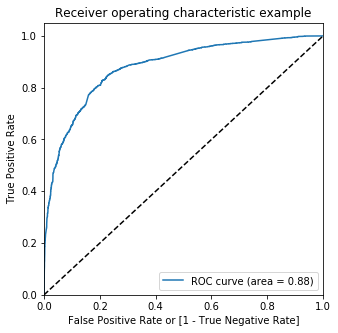

In [125]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

<font color= green>___The area under ROC curve is 0.88 which is a very good value.___</font>

In [126]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.218354,0,1,1,1,0,0,0,0,0,0,0
1,1,0.868622,1,1,1,1,1,1,1,1,1,1,0
2,1,0.989079,1,1,1,1,1,1,1,1,1,1,1
3,1,0.812696,1,1,1,1,1,1,1,1,1,1,0
4,0,0.430816,0,1,1,1,1,1,0,0,0,0,0


In [127]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.388683,1.000000,0.000000
0.1,0.1,0.592610,0.968576,0.353566
0.2,0.2,0.755566,0.892601,0.668437
0.3,0.3,0.799474,0.852029,0.766060
0.4,0.4,0.812307,0.784407,0.830046
0.5,0.5,0.807978,0.673429,0.893526
0.6,0.6,0.801175,0.607796,0.924127
0.7,0.7,0.786333,0.530231,0.949165
0.8,0.8,0.759895,0.424025,0.973445
0.9,0.9,0.720934,0.299125,0.989125


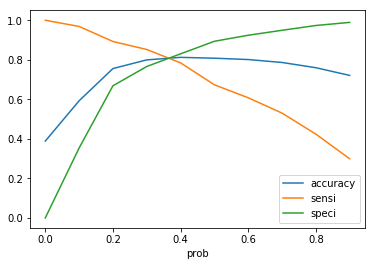

In [128]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the graph it is visible that the optimal cut off is at 0.37.

In [129]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.218354,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.868622,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.989079,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.812696,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.430816,0,1,1,1,1,1,0,0,0,0,0,1


In [130]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.806895485466914

In [131]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3194,  760],
       [ 489, 2025]], dtype=int64)

In [132]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [133]:
# Calculating the sensitivity
TP/(TP+FN)

0.8054892601431981

In [134]:
# Calculating the specificity
TN/(TN+FP)

0.8077895801719778

With the current cut off as 0.37 we have accuracy, sensitivity and specificity of around 80%.

## 8. Prediction on Test set

In [135]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [136]:
# Substituting all the columns in the final train model
col = X_train.columns

In [137]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Specialization_Unspecified,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
567,1.0,0.015936,0.147359,0.166667,1,0,0,0,0,0,0,0,0,0
2303,1.0,0.007968,0.688859,0.083333,1,0,0,0,0,0,0,0,1,0
1523,1.0,0.011952,0.596538,0.125000,0,0,0,0,0,0,0,0,0,0
6923,1.0,0.019920,0.083000,0.208333,1,0,0,0,0,0,0,0,0,0
7841,1.0,0.007968,0.311585,0.083333,1,0,0,0,0,0,0,0,0,0
3036,1.0,0.007968,0.103862,0.083333,0,0,1,0,0,1,0,0,1,0
2427,1.0,0.023904,0.051487,0.125000,1,0,0,0,0,1,1,0,0,0
8667,1.0,0.023904,0.044385,0.125000,0,0,1,0,0,0,0,0,0,0
3245,1.0,0.015936,0.284510,0.083333,1,0,0,0,0,0,0,0,0,0
1805,1.0,0.011952,0.164225,0.062500,1,0,0,0,0,1,0,0,0,0


In [138]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.165293
1,0,0.472054
2,0,0.833409
3,0,0.120693
4,0,0.323416


In [139]:
# Making prediction using cut off 0.37
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.37 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.165293,0
1,0,0.472054,1
2,0,0.833409,1
3,0,0.120693,0
4,0,0.323416,0
5,0,0.263213,0
6,1,0.898155,1
7,0,0.148082,0
8,0,0.308047,0
9,1,0.528097,1


In [140]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8131313131313131

In [141]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1413,  312],
       [ 206,  841]], dtype=int64)

In [142]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [143]:
# Calculating the sensitivity
TP/(TP+FN)

0.8032473734479465

In [144]:
# Calculating the specificity
TN/(TN+FP)

0.8191304347826087

With the current cut off as 0.37 we have accuracy, sensitivity and specificity of around 80%.

## 9. Precision-Recall

In [145]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3533,  421],
       [ 821, 1693]], dtype=int64)

In [146]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8008514664143803

In [147]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6734287987271281

With the current cut off as 0.37 we have Precision around 80% and Recall around 67%



## 9.1. Precision and recall tradeoff

In [149]:
from sklearn.metrics import precision_recall_curve

In [150]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       1
 3       1
 4       0
 5       1
 6       1
 7       0
 8       0
 9       0
 10      0
 11      0
 12      0
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      0
 20      1
 21      1
 22      0
 23      0
 24      1
 25      0
 26      1
 27      0
 28      0
 29      0
        ..
 6438    0
 6439    0
 6440    0
 6441    1
 6442    0
 6443    0
 6444    0
 6445    1
 6446    0
 6447    1
 6448    0
 6449    1
 6450    0
 6451    0
 6452    0
 6453    0
 6454    1
 6455    0
 6456    1
 6457    0
 6458    0
 6459    0
 6460    0
 6461    0
 6462    0
 6463    0
 6464    1
 6465    1
 6466    0
 6467    1
 Name: Converted, Length: 6468, dtype: int64, 0       0
 1       1
 2       1
 3       1
 4       0
 5       0
 6       0
 7       0
 8       1
 9       0
 10      0
 11      0
 12      0
 13      0
 14      0
 15      0
 16      0
 17      0
 18      0
 19      0
 20      0
 21      1
 22      0
 23      0
 24      1
 25      

In [151]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

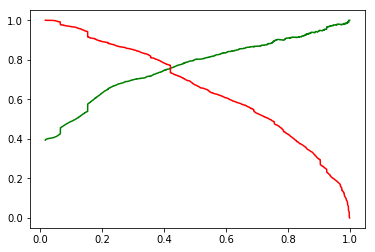

In [152]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [153]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.218354,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.868622,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.989079,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.812696,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.430816,0,1,1,1,1,1,0,0,0,0,0,1


In [154]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8133889919604206

In [155]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3309,  645],
       [ 562, 1952]], dtype=int64)

In [156]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [157]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.751636503658067

In [158]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7764518695306285

With the current cut off as 0.41 we have Precision around 75% and Recall around 77%

## 10. Prediction on Test set

In [160]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.165293
1,0,0.472054
2,0,0.833409
3,0,0.120693
4,0,0.323416


In [161]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.165293,0
1,0,0.472054,1
2,0,0.833409,1
3,0,0.120693,0
4,0,0.323416,0
5,0,0.263213,0
6,1,0.898155,1
7,0,0.148082,0
8,0,0.308047,0
9,1,0.528097,1


In [162]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.165293,0
1,0,0.472054,1
2,0,0.833409,1
3,0,0.120693,0
4,0,0.323416,0
5,0,0.263213,0
6,1,0.898155,1
7,0,0.148082,0
8,0,0.308047,0
9,1,0.528097,1


In [163]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.810966810966811

In [164]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1444,  281],
       [ 243,  804]], dtype=int64)

In [165]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [166]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7410138248847926

In [167]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7679083094555874

<font color= green>___With the current cut off as 0.41 we have Precision around 74% and Recall around 77%___</font>

## Conclusion from EDA
It was found that the variables that mattered the most in the potential buyers are (In descending order) :
1.	The total time spend on the Website.
2.	Total number of visits.
3.	When the lead source was: <br>
a.	Google<br>
b.	Direct traffic<br>
c.	Organic search<br>
d.	Welingak website<br>
4.	When the last activity was:<br>
a.	SMS<br>
b.	Olark chat conversation<br>
5.	When the lead origin is Lead add format.
6.	When their current occupation is as a working professional.<br>
Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.


## Model Evalution- 

## 1) Train Data-set on 0.37 cutoff
1) Accuracy = 80.68%

2) Sensitivity = 80.54%

3) Specificity = 80.77%


## 2) Test Data-set on 0.37 cutoff
1) Accuracy = 81.31%

2) Sensitivity = 80.32%

3) Specificity = 81.9%


## 3)Train Data-set on 0.41 cutoff-

1) Precision-75.16

2) Recall- 77.64



## 4)Test Data-set on 0.41 cutoff-

1) Precision-74.10

2) Recall- 76.80


## 5) Test Data-set on 0.37 cutoff-

1) Precision-80.08

2) Recall- 67.15


